## Project Intro: Analysis of US Tax Revenue

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'

import numpy as np

In [4]:
from ipywidgets import interact
import numpy as np
from math import pi

from bokeh.charts import Bar, output_file
from bokeh.charts.attributes import ColorAttr, CatAttr
from bokeh.charts.builders.bar_builder import BarBuilder

from bokeh.io import push_notebook, output_notebook, output_file, show
from bokeh.plotting import figure

from bokeh.models.widgets import Panel, Tabs

output_notebook()

Loading BokehJS ...

In [5]:
df = pd.read_csv('../STC_2015_00A2/STC_2015_00A2_with_ann.csv')

c15 = df[['GEO.display-label', 'YEAR.id', 
            'GOVTAX.display-label', 'AMOUNT']]

c15.columns = [['state', 'year', 'type', 'amount']]
c15 = c15[1:] # remove the first row that doesn't contain data

In [6]:
def str2float(str_a):
    """convert string to float and amount in $Billions"""
    return float(str_a.replace(',',''))/10**6 

c15.amount = c15.amount.replace('X','0')
c15.amount = c15.amount.apply(str2float)

#### Analysis of 2015 US tax bahavior by CATEGORIES

In [7]:
total = c15[c15.type=='Total Taxes'].\
        sort_values('amount', ascending=False)

sales = c15[c15.type=='Sales and Gross Receipts Taxes'].\
        sort_values('amount', ascending=False)  
income = c15[c15.type=='Income Taxes'].\
        sort_values('amount', ascending=False) 
lic = c15[c15.type=='License Taxes'].\
        sort_values('amount', ascending=False)  
prop = c15[c15.type=='Property Taxes'].\
        sort_values('amount', ascending=False) 
other = c15[c15.type=='Other Taxes'].\
        sort_values('amount', ascending=False)

In [11]:
def bar_tax(df, title, c):
    
    plot_width, plot_height, bar_width = 600,300,1
    major_label_text_font_size ='7pt'
    axis_label_text_font_size  ='9pt'
    
    col = 'state'
    val = 'amount'  
    
    yaxis_axis_label = 'Tax collection, $B'    
    
    p = Bar(df, 
        label=CatAttr(columns=col, sort=False), 
        values=val, 
        title=title, bar_width=bar_width, color=c,
        plot_width=plot_width, plot_height=plot_height, legend=None)

    p.xaxis.major_tick_line_color = None
    p.yaxis.minor_tick_line_color = None

    p.xaxis.axis_label = None
    p.yaxis.axis_label = yaxis_axis_label

    p.yaxis.major_label_text_font_size = major_label_text_font_size
    p.xaxis.major_label_text_font_size = major_label_text_font_size
    p.xaxis.major_label_orientation    = pi/2
    p.yaxis.axis_label_text_font_size  = axis_label_text_font_size
    return p

In [12]:
p1= bar_tax(total[1:],  "Total tax revenues",    "wheat")
p2= bar_tax(sales[1:],  "Sales tax revenues",    "yellowgreen")
p3= bar_tax(income[1:], "Income tax revenues",   "red")
p4= bar_tax(lic[1:],      "Lisence tax revenues",  "blue")
p5= bar_tax(prop[1:],   "Property tax revenues", "gold")
p6= bar_tax(other[1:],  "Other tax revenues",    "grey")

In [13]:
tab1 = Panel(child=p1, title="Total Tax")
tab2 = Panel(child=p2, title="Sales tax")
tab3 = Panel(child=p3, title="Income tax")
tab4 = Panel(child=p4, title="Lisence tax")
tab5 = Panel(child=p5, title="Property tax")
tab6 = Panel(child=p6, title="Others")

tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5, tab6])

show(tabs)

#### Analysis of 2015 US tax bahavior by STATES

Tax collection comes primarily from Income and Sales Taxes


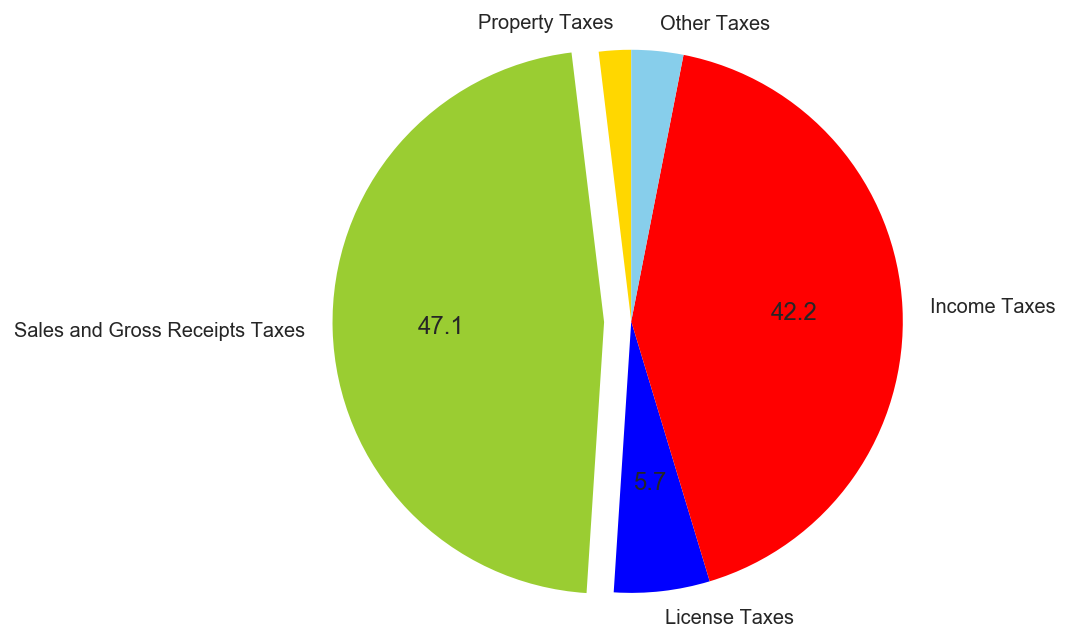

In [14]:
# Pie chart, where the slices will be ordered 
# and plotted counter-clockwise:
explode = (0., 0.1, 0., 0., 0.)  
colors = ['gold', 'yellowgreen',  'blue', 'red', 'skyblue']

def my_autopct(pct):
    return ('%.1f' % pct) if pct > 4 else ''

fig1, ax1 = plt.subplots()
ax1.pie(c15[1:6].amount,  explode=explode, labels=c15[1:6].type, 
        autopct=my_autopct, 
#        pctdistance=0.9, labeldistance=1.2,
        shadow=False, startangle=90,
        colors=colors
)
ax1.axis('equal')  # Equal aspect ratio ensures a circle.

print "Tax collection comes primarily from Income and Sales Taxes"
plt.show()